In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
# Create the engine 
engine = create_engine("sqlite:///hawaii.sqlite")

In [4]:
# Create a base class for an automap schema in SQLAlchemy
Base = automap_base()
# Reflect the schema of our SQLite tables into our code to create mappings
#Creates classes that keep code separate (decoupled)
Base.prepare(engine, reflect=True)
# Confirm that the Automap was able to find all the data in SQLite 
Base.classes.keys()

['measurement', 'station']

In [5]:
# Make variables to reference the measurement and station classes
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Creating a session (allows us to query for data)
session = Session(engine)

# Exploratory Climate Analysis

<AxesSubplot:xlabel='date'>

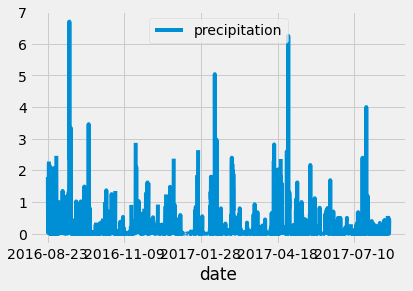

In [7]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp)
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
#print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
# Sort the dataframe by date
df = df.sort_index()
# print the sorted dataframe without the index
#print(df.to_string(index = False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [9]:
# How many stations are available in this dataset?


In [10]:
# What are the most active stations?
# List the stations and the counts in descending order.


In [11]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [12]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [13]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge